In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image
%matplotlib inline
sns.set()
sns.set_context('talk')

# Least Squares Regression as a Projection

Recall that we found the optimal coefficients for linear models by optimizing their cost functions with gradient descent.

We also mentioned that least squares linear regression can be solved analytically. While gradient descent is practical, this geometric perspective will provide a deeper understanding of linear regression.

## Case Study

We've been tasked with finding a good linear model and a rigorous argument for how we know that our model is sound, using the following data:

| x | y |
| - |:-|
| 3 | 2 |
| 0 | 1 |
| -1 | -2 |

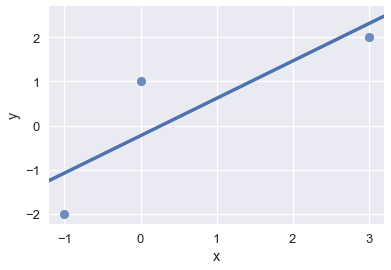

In [2]:
# HIDDEN
data = pd.DataFrame(
    [
        [3,2],
        [0,1],
        [-1,-2]
    ],
    columns=['x', 'y']
)

sns.regplot(x='x', y='y', data=data, ci=None)

Assume that the best model is one with the least error, and that the least squared error is an acceptable measure.

Recall that a simple linear regression model follows the form:

$$
\begin{aligned}
f_\hat{\theta} (x_i) 
&= \hat{\theta_0} + \hat{\theta_1} x_i \\
\end{aligned}
$$

Our goal is to find the $\hat{\theta}$ that results in the line with the least squared error $L(\hat{\theta}, \vec{x}, \vec{y})$:

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&= \sum_{i = 1}^{n}(y_i - f_\hat{\theta} (x_i))^2\\
&= \sum_{i = 1}^{n}(y_i - \hat{\theta_0} - \hat{\theta_1} x_i)^2\\
&= \sum_{i = 1}^{n}(y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix} ) ^2
\end{aligned}
$$

In our data set, n = 3, so let's expand out this equation by breaking up the summation.

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&=
(y_1 - \begin{bmatrix} 1 & x_1 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix})^2  \\
&+
(y_2 - \begin{bmatrix} 1 & x_2 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix})^2 \\
&+
(y_3 - \begin{bmatrix} 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix})^2 \\
\end{aligned}
$$

Notice that our loss function is a sum of squares. Now, notice that the *L2*-norm for a vector has a similar form: 

$$\Vert \vec{v} \Vert = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$ 

So if we can express each $y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix}$ as a vector, we can express our loss as the *L2*-norm, squared:

$$ 
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\vec{y} 
\quad - \quad 
X 
\begin{bmatrix} 
     \hat{\theta_0} \\
     \hat{\theta_1}
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\vec{y} 
\quad - \quad 
\vec{\hat{y}}
\qquad \right \Vert ^2 \\
\end{aligned}
$$

This gives us a new perspective on what it means to minimize the least squares error.


$X$ and $\vec{y}$ are fixed, but $\hat{\theta_0}$ and $\hat{\theta_1}$ can take on any value, so there are *infinite possible vectors* created by matrix multiplying $X$ and $\hat{\theta}$. To have the smallest loss, we want to choose $\hat{\theta_0}$ and $\hat{\theta_1}$ such that the resulting vector is as close to $\vec{y}$ as possible. This is the same underlying logic as before: find the smallest squared distance; but between two vectors $\vec{y}$ and $\vec{\hat{y}}$, rather than considering the indefinite number of data points. Lastly, notice that the matrix multiplication is a linear combination of the columns of $X$: each $\hat{\theta_i}$ only ever multiplies with one column of $X$--this perspective shows us that our $\hat{y}$ is a linear combination of the features of our data. Let's get some geometric intuition on these observations.



## Geometrical Intuition

Multiplying $X$ and $\hat{\theta}$ represents adding scalar multiples of the columns of $X$: $\vec{x}$ and $\vec{1}$, resulting in a linear combination. Here is an intuition:

Let's take two generic vectors, $\vec{x}$ and $\vec{1}$, colored black. We use red to represent the new vector we are adding, and blue for the older linear combinations.

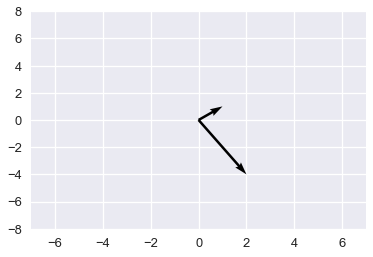

In [3]:
# HIDDEN
plt.quiver([0, 0], [0, 0], [1, 2], [1, -4], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

When $\hat{\theta_0} = 2$ and $\hat{\theta_1} = 0.5$, we add half of $x$ with two times the unit vector, resulting in a new vector.

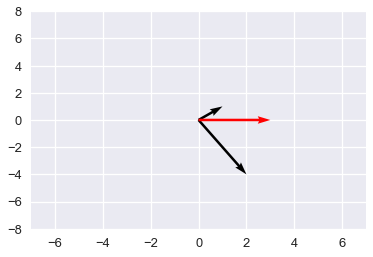

In [4]:
# HIDDEN
plt.quiver([0, 0, 0], [0, 0, 0], [1, 2, 3], [1, -4, 0], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

When $\hat{\theta_0} = 3$ and $\hat{\theta_1} = -1$, we add $3$ times the unit vector to $-1$ times $x$, resulting in yet another vector.

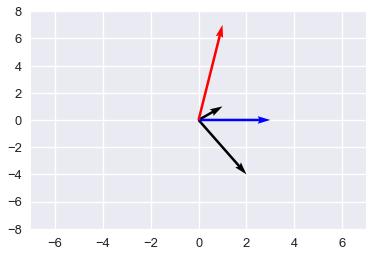

In [5]:
# HIDDEN
plt.quiver([0, 0, 0, 0], [0, 0, 0, 0], [1, 2, 3, 1], [1, -4, 0, 7], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'blue', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

With $\hat{\theta_0} = -2$ and $\hat{\theta_1} = -1$, we get:

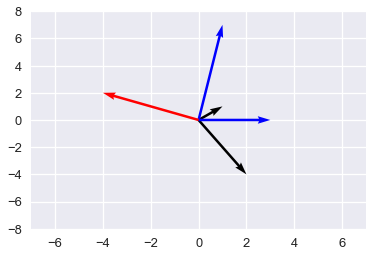

In [6]:
# HIDDEN
plt.quiver([0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 2, 3, 1, -4], [1, -4, 0, 7, 2], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'blue', 'blue', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

With $\hat{\theta_0} = -4$ and $\hat{\theta_1} = 1$, we get:

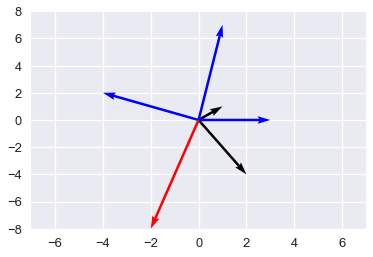

In [7]:
# HIDDEN
plt.quiver([0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 2, 3, 1, -4, -2], [1, -4, 0, 7, 2, -8], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'blue', 'blue', 'blue', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

This process can go on and on, showing that when we can use any scalar multiples, we can make an infinite number of linear combinations. However, infinite does not mean any--the linear combinations span a space defined by the original vectors. In this case, we would create a plane as you can start to see above. Formally, this illustrates how vectors $\vec{x}$ and $\vec{1}$ span a vector space.

Recall:
- our scatter plot
- $X$ and $\vec{y}$ are defined by the data
- our loss value is the L2 norm of $y-X \hat{\theta}$, squared. 

By inspection, we see that no line can perfectly fit our points, so we cannot achieve 0 loss. Thus, we know that $\vec{y}$ is not in the plane spanned by $\vec{x}$ and $\vec{1}$.

Visually,

<img src="../../notebooks-images/linear_projection1.png" width="500" />

Since our error is based on distance, we can see that to minimize $ L(\hat{\theta}, \vec{x}, \vec{y}) = \left \Vert  \vec{y} - X \hat{\theta} \right \Vert ^2$, we want $X \hat{\theta}$ to be as close to $\vec{y}$ as possible.

Mathematically, we are looking for the projection of $\vec{y}$ onto the vector space spanned by the columns of $X$ because the projection $\hat{y}$ has the property of being the closest point in the vector space to the vector $y$.
<img src="../../notebooks-images/linear_projection2.png" width="500" />

To see why, consider other points on the vector space, in purple.
<img src="../../notebooks-images/linear_projection3.png" width="500" />

By the Pythagorean Theorem, any other point on the plane is farther from $\vec{y}$ than $\hat{y}$ is. The longer the distance, the higher the least squared error. Thus, the length of the perpendicular represents the least squared error.

## Linear Algebra

Since we've snuck in a lot of linear algebra concepts already, all that's left is solving for the $\hat{\theta}$ that yields our desired $\hat{y}$.

A couple things to note: 

<img src="../../notebooks-images/linear_projection5.png" width="500" />

- $\hat{y} + e = \vec{y}$
- $\vec{e}$ is perpendicular to $\vec{x}$ and $\vec{1}$
- $\hat{y} = X \hat{\theta^*}$ is the vector closest to $y$ in the vector space spanned by $\vec{x}$ and $\vec{1}$

Thus, we arrive at the equation:

$$X  \hat{\theta^*} + \vec{e} = \vec{y}$$

Left-multiplying both sides by $X^T$:

$$X^T X  \hat{\theta^*} + X^T \vec{e} = X^T \vec{y}$$

But since $\vec{e}$ is perpendicular to the columns of $X$, $X^T \vec{e}$ is a column vector of $0$'s. Thus, we arrive at the Normal Equation:

$$X^T X  \hat{\theta^*} = X^T \vec{y}$$

From here, we can easily solve for $\hat{\theta^*}$ by left-multiplying both sides by $(X^T X)^{-1}$:

$$\hat{\theta^*} = (X^T X)^{-1} X^T \vec{y}$$

## Finishing up the Case Study

Let's return to our case study and apply what we've learned, and explain to our client why our solution is sound.

$$
\vec{y} = \begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \qquad X = \begin{bmatrix} 1 & 3 \\ 1 & 0 \\ 1 & -1 \end{bmatrix}
$$


$$
\begin{align}
\hat{\theta^*} 
&= 
\left(
\begin{bmatrix} 1 & 1 & 1 \\ 3 & 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 3 \\ 1 & 0 \\ 1 & -1 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 & 1 & 1 \\ 3 & 0 & -1 \end{bmatrix}
\begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \\
&= 
\left(
\begin{bmatrix} 3 & 2\\ 2 & 10 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 \\ 8 \end{bmatrix} \\
&=
\frac{1}{30-4}
\begin{bmatrix} 10 & -2\\ -2 & 3 \end{bmatrix}
\begin{bmatrix} 1 \\ 8 \end{bmatrix} \\
&=
\frac{1}{26}
\begin{bmatrix} -6 \\ 22 \end{bmatrix}\\
&=
\begin{bmatrix} - \frac{3}{13} \\ \frac{11}{13} \end{bmatrix}
\end{align}
$$

We have analytically found that best model for least squares regression is $f_\hat{\theta} (x_i) = - \frac{3}{13} + \frac{11}{13} x_i$. We know that our choice of $\hat{\theta}$ is sound by the mathematical property that the projection of $\vec{y}$ onto the span of the columns of $X$ yields the closest point in the vector space to $\vec{y}$. Under linear constraints using the least squares metric, solving for $\hat{\theta}$ by taking the projection guarantees us the optimal solution.